<center> <h1> <b> Digital Signal Processing (EE2800) </b> </h1> </center>


<dt> <h4>
 <b> Programming Assignment (02) : Discrete-Time Systems (Unit sample response) </b> </h4> </dt> 
 
<dt> <h4> Welcome to the second programming assignment (PA) on Digital Signal Processing (EE2800) course. The objective of this PA is to develop discrete-time systems, verify their properties and study their frequency domain characteristics. The major objectives of this PA are as follows:: </h4> </dt> 

<dd> <h4> 1. Developing discrete-time systems for specified tasks. </dd> </h4>

<dd> <h4> 2. Verifying linearity and time-invariant properties of an arbitrary discrete-time system. </dd> </h4>

<dd> <h4> 3. Verifying the operations of discrete time LTI systems on natural signals.</dd> </h4>



<dt> <h4> <b> Instructions </b> </dt> </h4>

<dd> <h4> 1. Plagiarism is strictly prohibited. </h4> </dd> 
<dd> <h4> 2. Delayed submissions will be penalized with a scaling factor of 0.5 per each hour. </h4> </dd> 
<dd> <h4> 3. Deadline will not be be extended under any circumstances </h4> </dd> 


[link to audio, speech and digital images required for this PA](https://drive.google.com/drive/folders/13t992Z3WxDD7zDajp5FTrA_9o8rOoZoD?usp=sharing)


<h4> <b> Part (1) : Implementation of discrete-time systems : </b>  

<h4> <b> Objective : </b>  

<dt> <h4> The concept of system is very common in engineering. A physical system may be defined as a physical device that performs a specific operation on an input signal. Most of the physical systems are inertial in nature, in the sense that they produce an output or response only when they are subjected to an external input or excitation. In consistent with this definition of the
system, a digital system is one that accepts a digital signal as input, and generates another digital signal as its output. </h4> </dt>

<dt> <h4> For our purposes, it is convenient to broaden the definition of a system to include not only physical devices, but also software realizations of operations on a signal. In digital processing of signals on a digital computer, the operations performed on a signal consist of a series of mathematical operations as specified by a software program. In this case, the program represents an implementation of the system in software. Thus we have a system that is realized on a digital computer by means of a sequence of mathematical operations; that is we have digital signal processing realized in software. For example, a digital computer can be programmed to reduce noise and interference in the input signal. Alternatively, the digital processing on the signal may be performed by digital hardware (logic circuits) configured to perform the desired
operations.</h4> </dt> 


<h4> <b> Programming Questions : </b>  


<dt> <h4> a. Simulate a time-reversal system in python, that takes an arbitrary input x[n], and outputs it time-reversed version. y[n] = x[−n] </h4> </dt>


<dt> <h4> b. Simulate a discrete-time system in python, that takes an arbitrary signal x[n] as input and generates its even component at the output. $y[n] = x_{e}[n]$. Use the system developed in part (a) to realize this. </h4> </dt>

<dt> <h4> c. Simulate a discrete-time system in python, that takes an arbitrary signal x[n] as input and generates its odd component at the output. $y[n] = x_{o}$[n]. Use the system developed in part (a) to realize this. </h4> </dt>

<dt> <h4> d. Simulate an ideal-delay system, that accepts an arbitrary input x[n] and outputs its time delayed version. y[n] = x[n − d], where d is an integer. </h4> </dt>

<dt> <h4> e. Simulate a moving average system described by the following input-output relation:  </h4> </dt>
<dt> <h4> <center> $y[n] = \frac{1}{M+1} \sum_{k=0}^{M} x[n-k]$ </center> </h4> </dt>
<dd> <h4>  Use the ideal delay system developed in part (e) to realize this. </dd> </h4>

<dt> <h4> f. Simulate a backward difference system described by the following input-output relation  </h4> </dt>
<dt> <h4> <center> $y[n] = x[n] - x[n-1]$ </center> </h4> </dt>

<dt> <h4> g. Simulate a discrete-time system with input-output relation: </h4> </dt>
<dt> <h4> <center> $y[n] = x[n] - 2x[n-1] + x[n-2]$ </center> </h4> </dt>


<dt> <h4> h. Simulate a squarer system with input-output relation $y[n] = x^{2}[n]$ </h4> </dt>

<dt> <h4> i. Simulate a discrete-time system whose input and output are related by $y[n] = x[n-2] + x[2-n]$  </h4> </dt>

<dt> <h4> ------------ </h4> </dt>

<dt> <h4>
Verify the operation of all the above systems for input $x[n] = 0.95^n u[n]$ . Use M=10 for the moving average system. Plot the input and output of all the systems. </h4> </dt>



In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'x[n]')

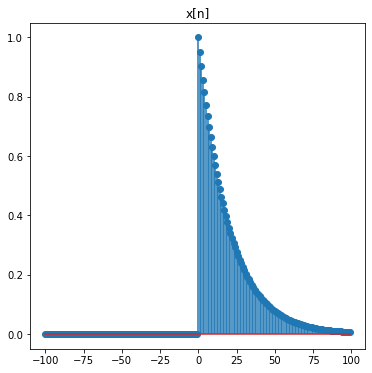

In [2]:


# singal function generation 
n = np.arange(-100,100 , 1)
x = np.zeros(np.shape(n))


for i in range(0,len(n)):
    if n[i] >= 0:
        x[i] = pow(0.95,n[i]) 
 
plt.figure(figsize=(6,6))  
plt.stem(n,x)
plt.title("x[n]")


In [3]:
# all the function defenation 
def TimeReversal(x,n):
    x = x[::-1]
    n = -n[::-1]
    return x ,n
    
    
def evenSignal(x):
    even = np.zeros(np.shape(x))
    temp ,N= TimeReversal(x,n)
    for i in range(0,len(x)):
        even[i] = (x[i]+ temp[i])/2
    return even
def oddSignal(x):
    odd = np.zeros(np.shape(x))
    temp ,N = TimeReversal(x , n)
    for i in range(0,len(x)):
        odd[i] = (x[i]- temp[i])/2
    return odd

def delay(x,d,N):
    delay = np.zeros((len(x)+abs(d) ,))
 
    if(d >= 0):
        delay[d::] = x[::]
       
        N = np.arange(np.min(n), np.max(n)+d+1)
    else:
        delay[:(len(delay)+d):] = x[::]
        N = np.arange(np.min(n)+d -1, np.max(n))
    return delay , N


def movingAvg(x , M , n):
    avg = np.zeros(np.shape(n))
    sum = 0
    for i in range(0,len(n)):
        for j in range(0 , M):
            
            temp = np.where(n == (n[i] - j))[0]
            if len(temp) == 0:
                continue
            #print("the value of a tuple is " ,temp)
            else :
                sum+= x[temp[0]]
        avg[i] = sum
        sum = 0
    return avg 

def backwardDifference(x  ,N):
    x1, m = delay(x , 1 ,N)
    temp = np.zeros(np.size(N))
    for i in range(0 , len(N)):
        temp[i] = x[i] - x1[i]
    return temp

def fq(x ,N):
    x1 ,m = delay(x , 1 , N)
    x2 ,m2 = delay(x ,2 ,N)
    temp = np.zeros(np.shape(N))
    for i in range(0 ,len(N)):
        temp[i] = x[i] - 2*x1[i] +  x2[i]
    return temp 
def squarer(x , n):
    temp = np.zeros(np.shape(n))
    for i in range(0 ,len(n)):
        temp[i] = pow(x[i], 2)
    return temp
def iq(x ,N):
    
    
    x1 , m = delay(x,2,N) 
    x2,N = TimeReversal(x1 , N)
    temp = np.zeros(np.shape(N))
    for i in range(0 ,len(n)):
        temp[i] = x1[i] + x2[i]
    return temp

def Resize(original , Extra):
    temp = np.zeros(np.shape(original))
    for i in range(0 , len(original)):
        temp[i] = Extra[i]
    return temp
    
        

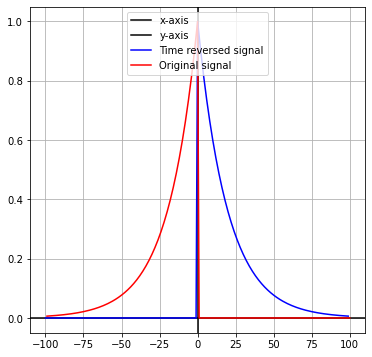

In [4]:
###############################################
#(a) 
################################################
x_timeReversed ,N= TimeReversal(x,n) # genereating the reversed function

#ploting the graph
plt.figure(figsize=(6,6))  
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")
plt.plot(n,x,color = "blue")
plt.plot(N,x_timeReversed ,color="red")
plt.autoscale(enable=True, axis='both', tight=None)
plt.legend(["x-axis", "y-axis","Time reversed signal","Original signal"], loc ="upper center")
plt.grid()

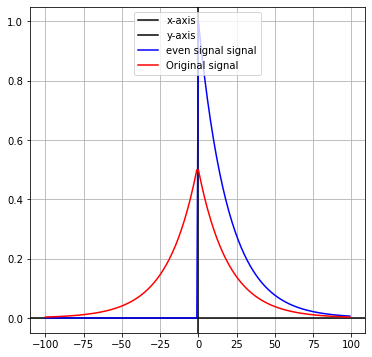

In [5]:
###############################################
#(b) 
################################################

x_evenSignal = evenSignal(x) # genereating the reversed function

#ploting the graph
plt.figure(figsize=(6,6))  
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")

plt.plot(n,x,color = "blue")
plt.plot(n,x_evenSignal ,color="red")
plt.autoscale(enable=True, axis='both', tight=None)
plt.legend(["x-axis", "y-axis","even signal signal","Original signal"], loc ="upper center")
plt.grid()





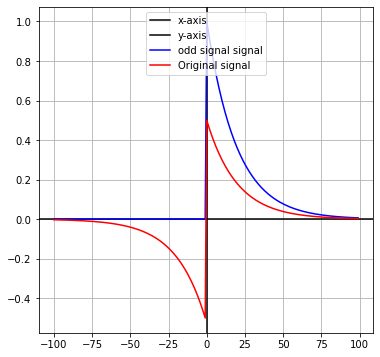

In [6]:
###############################################
#(c) 
################################################


x_oddSignal = oddSignal(x) # genereating the reversed function

#ploting the graph
plt.figure(figsize=(6,6))  
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")

plt.plot(n,x,color = "blue")
plt.plot(n,x_oddSignal ,color="red")
plt.autoscale(enable=True, axis='both', tight=None)
plt.legend(["x-axis", "y-axis","odd signal signal","Original signal"], loc ="upper center")
plt.grid()




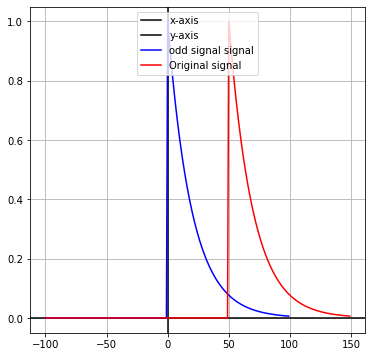

In [7]:
###############################################
#(d) 
################################################
x_delayedSignal, x_updatedInputvalues = delay(x ,50 ,n ) # genereating the reversed function

#ploting the graph
plt.figure(figsize=(6,6))  
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")

plt.plot(n,x,color = "blue")
plt.plot(x_updatedInputvalues,x_delayedSignal ,color="red")
plt.autoscale(enable=True, axis='both', tight=None)
plt.legend(["x-axis", "y-axis","odd signal signal","Original signal"], loc ="upper center")
plt.grid()




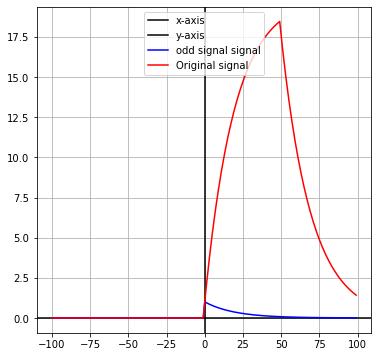

In [8]:
###############################################
#(e) 
################################################


x_avg = movingAvg(x ,50 ,n ) # genereating the reversed function

#ploting the graph

plt.figure(figsize=(6,6))  
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")

plt.plot(n,x,color = "blue")
plt.plot(n,x_avg ,color="red")
plt.autoscale(enable=True, axis='both', tight=None)
plt.legend(["x-axis", "y-axis","odd signal signal","Original signal"], loc ="upper center")
plt.grid()






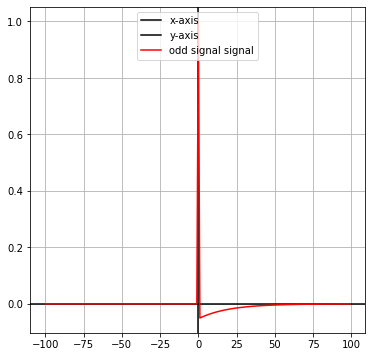

In [9]:
###############################################
#(f) 
################################################

x_bckDiff = backwardDifference(x ,n ) # genereating the reversed function

#ploting the graph

plt.figure(figsize=(6,6))  
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")

#plt.plot(n,x,color = "blue")
plt.plot(n,x_bckDiff ,color="red")
plt.autoscale(enable=True, axis='both', tight=None)
plt.legend(["x-axis", "y-axis","odd signal signal","Original signal"], loc ="upper center")
plt.grid()





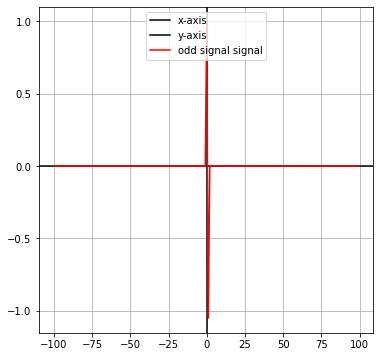

In [10]:
###############################################
#(g) 
################################################


x_fq = fq(x ,n ) # genereating the reversed function

#ploting the graph

plt.figure(figsize=(6,6))  
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")

#plt.plot(n,x,color = "blue")
plt.plot(n,x_fq ,color="red")
plt.autoscale(enable=True, axis='both', tight=None)
plt.legend(["x-axis", "y-axis","odd signal signal","Original signal"], loc ="upper center")
plt.grid()






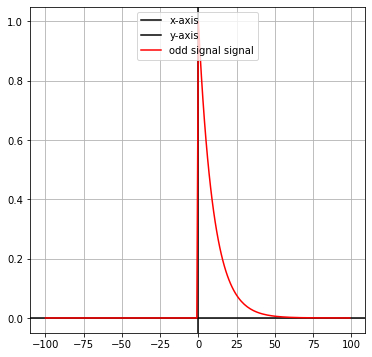

In [11]:
###############################################
#(h) 
################################################




x_square = squarer(x ,n ) # genereating the reversed function

#ploting the graph

plt.figure(figsize=(6,6))  
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")

#plt.plot(n,x,color = "blue")
plt.plot(n,x_square ,color="red")
plt.autoscale(enable=True, axis='both', tight=None)
plt.legend(["x-axis", "y-axis","odd signal signal","Original signal"], loc ="upper center")
plt.grid()




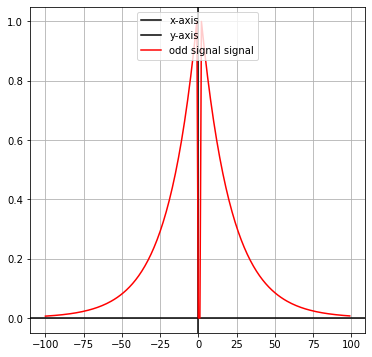

In [12]:
###############################################
#(i) 
################################################

x_iq = iq(x ,n ) # genereating the reversed function

#ploting the graph

plt.figure(figsize=(6,6))  
plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")

#plt.plot(n,x,color = "blue")
plt.plot(n,x_iq ,color="red")
plt.autoscale(enable=True, axis='both', tight=None)
plt.legend(["x-axis", "y-axis","odd signal signal","Original signal"], loc ="upper center")
plt.grid()







<h4> <b> Report your observations : </b>  

<dt> <h4> i. </h4> </dt>
<dt> <h4> ii. </h4> </dt>
<dt> <h4> iii. </h4> </dt>



<h4> <b> Part (2) : Linear Time-Invariant Systems : </b> 
<h4> <b> Objective : </b>  

<dt> <h4> Linear time-invariant (LTI) systems form an important subset of general systems. Sophisticated mathematical tools are available to analyze the LTI systems. For example, convolution can be used to determine the output of an LTI system to an arbitrary input. In order to make use of the available mathematical tools, we need to determine whether a given system satisfies the
properties of linearity and time-invariance or not. The objective of this experiment is to verify the linearity and time-invariance properties of a given LTI system using a digital system. </h4> </dt>

<h4> <b> Programming Questions : </b>  

<dt> <h4> a. Generate the following test signals for −100 ≤ n ≤ 100.</h4> </dt>
<dt> <h4> <center> $x_{1}[n] = 0.9^{n}u[n]$ </center> </dt></h4>
<dt> <h4> <center> $x_{2}[n] = sin(2\pi \frac{200}{800} n)$ </center> </dt></h4>


<dt> <h4> b. <b> Linearity </b>: Apply $x_1[n]$, and $x_2[n]$ as inputs to the system and generate the outputs $y_1[n]$ and $y_2[n]$, respectively. Now apply $ax_1[n] + bx_2[n]$ as input to the system to generate the output y[n]. To verify linearity check whether y[n] is equal to $ay_1[n]+by_2[n]$ or not. Check
for linearity of all the systems simulated in part (a).   </h4> </dt>

<dt> <h4> c. <b> Time-Invariance </b>: Apply $x_1[n]$ as input to the system and generate the output $y_1[n]$. Now apply $x_1[n − d]$ as input and generate the output y[n]. To verify time-invariance property check whether y[n] is equal to $y_1[n − d]$ or not. Repeat verification for $x_2[n]$. Check for time-invariance of all the systems simulated in part (a).</h4> </dt>






<h4> <b> Report your observations : </b>  

<dt> <h4> i. </h4> </dt>
<dt> <h4> ii. </h4> </dt>
<dt> <h4> iii. </h4> </dt>



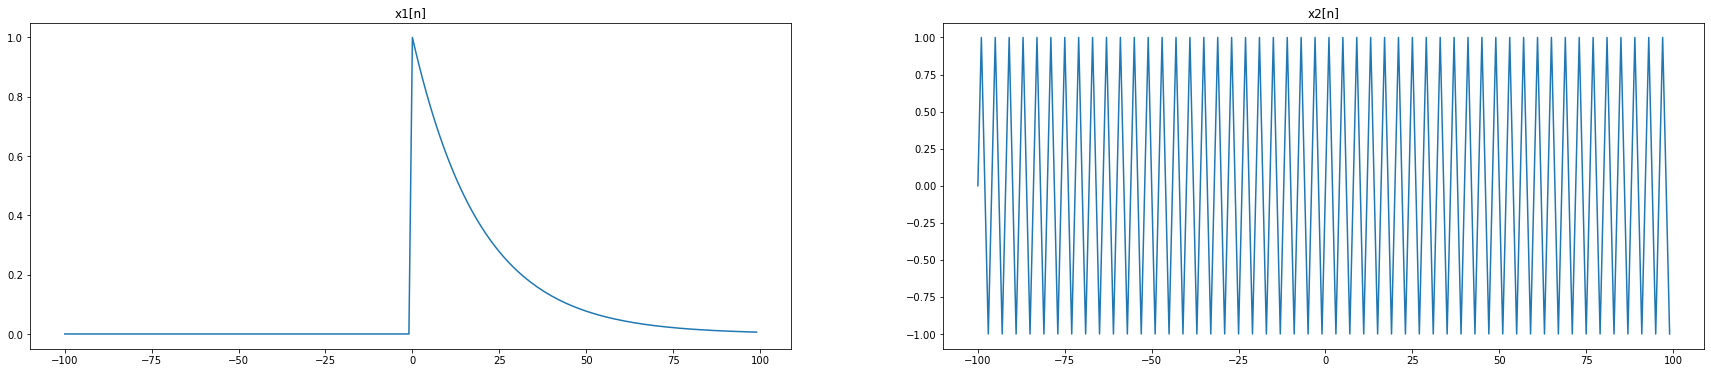

In [13]:
###############################################
#(a) 
################################################

#generating function
n = np.arange(-100,100 , 1)
x1 = np.zeros(np.shape(n))

x2 = np.zeros(np.shape(n))
for i in range(0,len(n)):
    if n[i] >= 0:
        x1[i] = pow(0.95,n[i]) 
    x2[i] = np.sin(2*np.pi*(200/800)*n[i])
plt.figure(figsize=(30,6))  
plt.subplot(1,2,1)
plt.title("x1[n]")
plt.plot(n,x1)
plt.subplot(1,2,2)
plt.title("x2[n]")
plt.plot(n,x2)


linear system


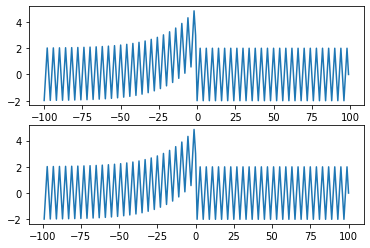

In [14]:
###############################################
#(b) 
################################################
# for system 1  time reversal
y1 ,N1= TimeReversal(x1,n)
y2 ,N2= TimeReversal(x2,n)
x3 = 3*x1+2*x2 
y3 ,N3= TimeReversal(x3,n)
y4 = 3*y1 + 2*y2
if np.array_equal(np.round(y3,8), np.round(y4,8)):
    print("linear system")
    plt.subplot(2,1,1)
    plt.plot(n,y4 )
    plt.subplot(2,1,2)
    plt.plot(N3,y3)
else:
    print("Non linear")
    plt.subplot(2,1,1)
    plt.plot(n,y4 )
    plt.subplot(2,1,2)
    plt.plot(N3,y3)



    

linear system


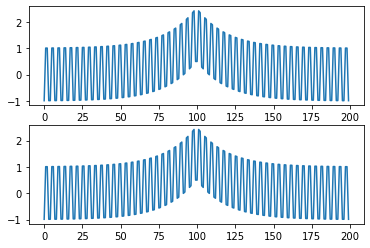

In [15]:
#for even system 2
y1 = evenSignal(x1)
y2= evenSignal(x2)
x3 = 3*x1+2*x2 
y3 = evenSignal(x3)
y4 = 3*y1 + 2*y2
if np.array_equal(np.round(y3,8), np.round(y4,8)):
    print("linear system")
    plt.subplot(2,1,1)
    plt.plot(y4)
    plt.subplot(2,1,2)
    plt.plot(y3)
else:
    print("Non linear")
    plt.subplot(2,1,1)
    plt.plot(y4)
    plt.subplot(2,1,2)
    plt.plot(y3)


linear system


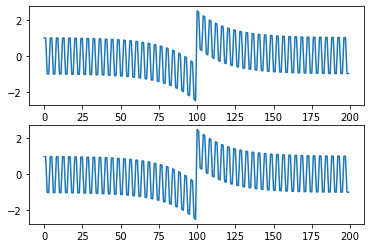

In [16]:
# for odd signal
y1 = oddSignal(x1)
y2= oddSignal(x2)
x3 = 3*x1+2*x2 
y3 = oddSignal(x3)
y4 = 3*y1 + 2*y2
if np.array_equal(np.round(y3,8), np.round(y4,8)):
    print("linear system")
    plt.subplot(2,1,1)
    plt.plot(y4)
    plt.subplot(2,1,2)
    plt.plot(y3)
else:
    print("Non linear system")
    plt.subplot(2,1,1)
    plt.plot(y4)
    plt.subplot(2,1,2)
    plt.plot(y3)


linear system


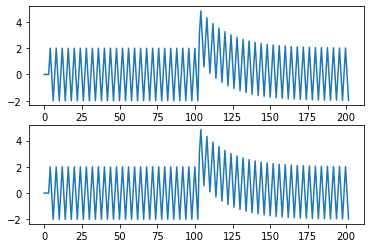

In [17]:
#for delay system
y1,m1 = delay(x1,3,n)
y2,m2= delay(x2,3,n)
x3 = 3*x1+2*x2 
y3 ,m3= delay(x3,3,n)
y4 = 3*y1 + 2*y2
if np.array_equal(np.round(y3,8), np.round(y4,8)):
    print("linear system")
    plt.subplot(2,1,1)
    plt.plot(y4)
    plt.subplot(2,1,2)
    plt.plot(y3)
else:
    print("Non linear system")


linear system


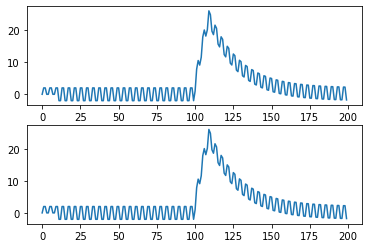

In [18]:
# for moving average system
y1 = movingAvg(x1,10,n)
y2= movingAvg(x2,10,n)
x3 = 3*x1+2*x2 
y3 = movingAvg(x3,10,n)
y4 = 3*y1 + 2*y2
if np.array_equal(np.round(y3,8), np.round(y4,8)):
    print("linear system")
    plt.subplot(2,1,1)
    plt.plot(y4)
    plt.subplot(2,1,2)
    plt.plot(y3)
else:
    print("Non linear system")
    plt.subplot(2,1,1)
    plt.plot(y4)
    plt.subplot(2,1,2)
    plt.plot(y3)


linear system


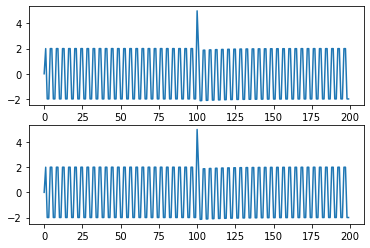

In [19]:
# for backward difference system 
y1 = backwardDifference(x1,n)
y2= backwardDifference(x2,n)
x3 = 3*x1+2*x2 
y3 = backwardDifference(x3,n)
y4 = 3*y1 + 2*y2
if np.array_equal(np.round(y3,7), np.round(y4,7)):
    print("linear system")
    plt.subplot(2,1,1)
    plt.plot(y4)
    plt.subplot(2,1,2)
    plt.plot(y3)
else:
    print("Non linear system")


linear system


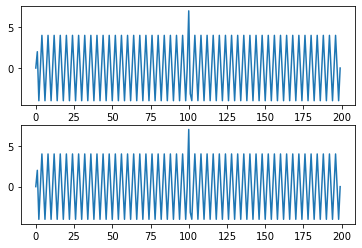

In [20]:
# for system in question g
y1 = fq(x1,n)
y2= fq(x2,n)
x3 = 3*x1+2*x2 
y3 = fq(x3,n)
y4 = 3*y1 + 2*y2
#print(y3, y4)
if np.array_equal(np.round(y3,7), np.round(y4,7)):
    print("linear system")
    plt.subplot(2,1,1)
    plt.plot(y4)
    plt.subplot(2,1,2)
    plt.plot(y3)
else:
    print("Non linear system")
    plt.subplot(2,1,1)
    plt.plot(y4)
    plt.subplot(2,1,2)
    plt.plot(y3)


Non linear system


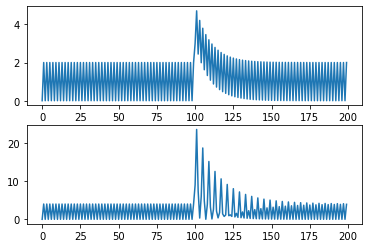

In [21]:
# for square system 
y1 = squarer(x1,n)
y2= squarer(x2,n)
x3 = 3*x1+2*x2 
y3 = squarer(x3,n)
y4 = 3*y1 + 2*y2
if np.array_equal(np.round(y3,7), np.round(y4,7)):
    print("linear system ")
    plt.subplot(2,1,1)
    plt.plot(y4)
    plt.subplot(2,1,2)
    plt.plot(y3)
else:
    print("Non linear system")
    plt.subplot(2,1,1)
    plt.plot(y4)
    plt.subplot(2,1,2)
    plt.plot(y3)


linear system


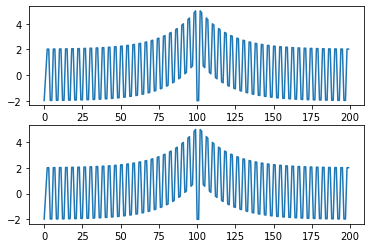

In [22]:
# for system in question i
y1 = iq(x1,n)
y2= iq(x2,n)
x3 = 3*x1+2*x2 
y3 = iq(x3,n)
y4 = 3*y1 + 2*y2
if np.array_equal(np.round(y3,7), np.round(y4,7)):
    print("linear system")
    plt.subplot(2,1,1)
    plt.plot(y4)
    plt.subplot(2,1,2)
    plt.plot(y3)
else:
    print("Non linear system")
  
    plt.subplot(2,1,1)
    plt.plot(y4)
    plt.subplot(2,1,2)
    plt.plot(y3)


100
210
time invarient system


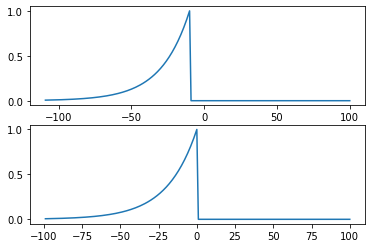

In [23]:
###############################################
#(c) 
################################################

# for time reversal system 
y1 ,N1= TimeReversal(x1,n)
yn ,m = delay(x1,10,n)
y2 ,N2 = TimeReversal(yn,m)

 # makes the shape of the two array's same for compare
print(len(np.trim_zeros(y2)))
if len(np.trim_zeros(y2)) > len(np.trim_zeros(y1)): 
    yn2 = Resize(np.trim_zeros(y1),np.trim_zeros(y2))
else :
    yn2 = Resize(np.trim_zeros(y2),np.trim_zeros(y1))
print(len(y2))

if np.array_equal(np.trim_zeros(y1),np.trim_zeros(yn2)): 
    print("time invarient system")
    plt.subplot(2,1,1)
    plt.plot(N2,y2)
    plt.subplot(2,1,2)
    plt.plot(N1,y1)
else :
    print("not time invarient system")
   
    plt.plot(N2,y2)
   
    plt.plot(N1,y1)

180
not time invarient system


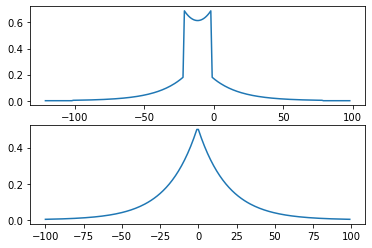

In [24]:
# for even signal system 
y1 = evenSignal(x1)
yn ,m = delay(x1,-20,n)
y2  = evenSignal(yn)
N2 = Resize(n,m) # makes the shape of the two array's same for compare
print(len(np.trim_zeros(y2)))
if len(np.trim_zeros(y2)) > len(np.trim_zeros(y1)): 
    yn2 = Resize(np.trim_zeros(y1),np.trim_zeros(y2))
else :
    yn2 = Resize(np.trim_zeros(y2),np.trim_zeros(y1))

if np.array_equal(np.trim_zeros(y1),np.trim_zeros(yn2)): 
    print("time invarient system")
    plt.subplot(2,1,1)
    plt.plot(m,yn)
    plt.subplot(2,1,2)
    plt.plot(n,y1)
else :
    print("not time invarient system")
    plt.subplot(2,1,1)
    plt.plot(m,y2)
    plt.subplot(2,1,2)
    plt.plot(n,y1)

180
not time invarient system


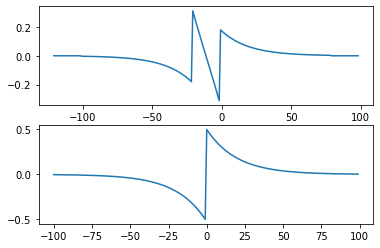

In [25]:
# for odd signal system 
y1 = oddSignal(x1)
yn ,m = delay(x1,-20,n)
y2  = oddSignal(yn)
N2 = Resize(n,m) # makes the shape of the two array's same for compare
print(len(np.trim_zeros(y2)))
if len(np.trim_zeros(y2)) > len(np.trim_zeros(y1)): 
    yn2 = Resize(np.trim_zeros(y1),np.trim_zeros(y2))
else :
    yn2 = Resize(np.trim_zeros(y2),np.trim_zeros(y1))

if np.array_equal(np.trim_zeros(y1),np.trim_zeros(yn2)): 
    print("time invarient system")
    plt.subplot(2,1,1)
    plt.plot(m,yn)
    plt.subplot(2,1,2)
    plt.plot(n,y1)
else :
    print("not time invarient system")
    plt.subplot(2,1,1)
    plt.plot(m,y2)
    plt.subplot(2,1,2)
    plt.plot(n,y1)

In [26]:
# for ideal delay signal system
# y1 = oddSignal(x1)
# yn ,m = delay(x1,-20,n)
# y2  = oddSignal(yn)
# N2 = Resize(n,m) # makes the shape of the two array's same for compare
# print(len(np.trim_zeros(y2)))
# if len(np.trim_zeros(y2)) > len(np.trim_zeros(y1)): 
#     yn2 = Resize(np.trim_zeros(y1),np.trim_zeros(y2))
# else :
#     yn2 = Resize(np.trim_zeros(y2),np.trim_zeros(y1))

# if np.array_equal(np.trim_zeros(y1),np.trim_zeros(yn2)): 
#     print("time invarient system")
#     plt.subplot(2,1,1)
#     plt.plot(m,yn)
#     plt.subplot(2,1,2)
#     plt.plot(n,y1)
# else :
#     print("not time invarient system")
#     plt.subplot(2,1,1)
#     plt.plot(m,y2)
#     plt.subplot(2,1,2)
#     plt.plot(n,y1)

220
time invarient system


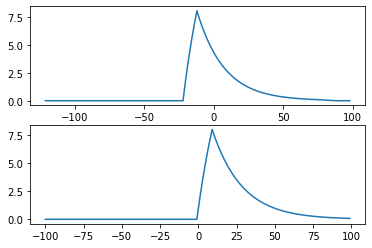

In [27]:
# for moving average signal system 
y1 = movingAvg(x1 , 10,n)
yn ,m = delay(x1,-20,n)
y2  = movingAvg(yn , 10 , m)
if len(np.trim_zeros(y2)) > len(np.trim_zeros(y1)): 
    yn2 = Resize(np.trim_zeros(y1),np.trim_zeros(y2))
else :
    yn2 = Resize(np.trim_zeros(y2),np.trim_zeros(y1))
print(len(y2))


if np.array_equal(np.trim_zeros(y1),np.trim_zeros(yn2)): 
    print("time invarient system")
    plt.subplot(2,1,1)
    plt.plot(m,y2)
    plt.subplot(2,1,2)
    plt.plot(n,y1)
else :
    print("not time invarient system")
    plt.subplot(2,1,1)
    plt.plot(m,y2)
    plt.subplot(2,1,2)
    plt.plot(n,y1)

250
250
time invarient system


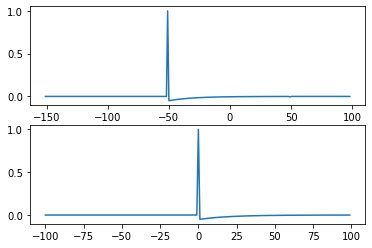

In [28]:
# for backwardDifference signal system 
y1 = backwardDifference(x1 ,n)
yn ,m = delay(x1,-50,n)
y2  = backwardDifference(yn , m)

print(len(m))
#N2 = Resize(n,m) # makes the shape of the two array's same for compare
if len(np.trim_zeros(y2)) > len(np.trim_zeros(y1)): 
    yn2 = Resize(np.trim_zeros(y1),np.trim_zeros(y2))
else :
    yn2 = Resize(np.trim_zeros(y2),np.trim_zeros(y1))
print(len(y2))


        

if np.array_equal(np.trim_zeros(y1),np.trim_zeros(yn2)): 
    print("time invarient system")
    plt.subplot(2,1,1)
    plt.plot(m,y2)
    plt.subplot(2,1,2)
    plt.plot(n,y1)
else :
    print("not time invarient system")
    plt.subplot(2,1,1)
    plt.plot(m,y2)
    plt.subplot(2,1,2)
    plt.plot(n,y1)

250
250
time invarient system


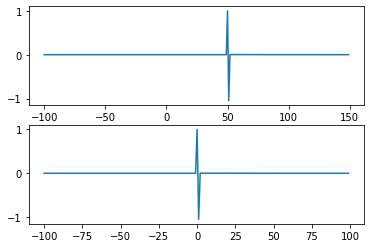

In [29]:
# for g question signal system 
y1 = fq(x1 ,n)
yn ,m = delay(x1,50,n)
y2  = fq(yn , m)

print(len(m))
#N2 = Resize(n,m) # makes the shape of the two array's same for compare
if len(np.trim_zeros(y2)) > len(np.trim_zeros(y1)): 
    yn2 = Resize(np.trim_zeros(y1),np.trim_zeros(y2))
else :
    yn2 = Resize(np.trim_zeros(y2),np.trim_zeros(y1))
print(len(y2))


        

if np.array_equal(np.trim_zeros(y1),np.trim_zeros(yn2)): 
    print("time invarient system")
    plt.subplot(2,1,1)
    plt.plot(m,y2)
    plt.subplot(2,1,2)
    plt.plot(n,y1)
else :
    print("not time invarient system")
    plt.subplot(2,1,1)
    plt.plot(m,y2)
    plt.subplot(2,1,2)
    plt.plot(n,y1)

250
250
time invarient system


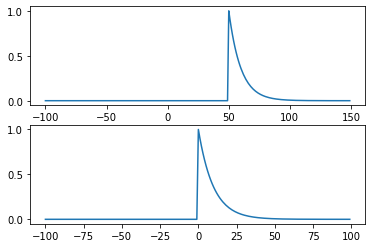

In [30]:
# for squarer signal system 
y1 = squarer(x1 ,n)
yn ,m = delay(x1,50,n)
y2  = squarer(yn , m)

print(len(m))
#N2 = Resize(n,m) # makes the shape of the two array's same for compare
if len(np.trim_zeros(y2)) > len(np.trim_zeros(y1)): 
    yn2 = Resize(np.trim_zeros(y1),np.trim_zeros(y2))
else :
    yn2 = Resize(np.trim_zeros(y2),np.trim_zeros(y1))
print(len(y2))


        

if np.array_equal(np.trim_zeros(y1),np.trim_zeros(yn2)): 
    print("time invarient system")
    plt.subplot(2,1,1)
    plt.plot(m,y2)
    plt.subplot(2,1,2)
    plt.plot(n,y1)
else :
    print("not time invarient system")
    plt.subplot(2,1,1)
    plt.plot(m,y2)
    plt.subplot(2,1,2)
    plt.plot(n,y1)

250
250
time invarient system


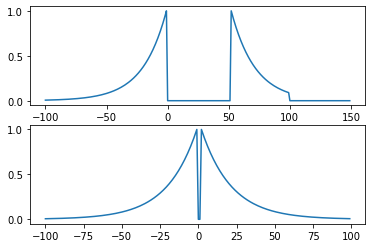

In [31]:
# for question i signal system 
y1 = iq(x1 ,n)
yn ,m = delay(x1,50,n)
y2  = iq(yn , m)

print(len(m))
#N2 = Resize(n,m) # makes the shape of the two array's same for compare
if len(np.trim_zeros(y2)) > len(np.trim_zeros(y1)): 
    yn2 = Resize(np.trim_zeros(y1),np.trim_zeros(y2))
else :
    yn2 = Resize(np.trim_zeros(y2),np.trim_zeros(y1))
print(len(y2))


        

if np.array_equal(np.trim_zeros(y1),np.trim_zeros(yn2)): 
    print("time invarient system")
    plt.subplot(2,1,1)
    plt.plot(m,y2)
    plt.subplot(2,1,2)
    plt.plot(n,y1)
else :
    print("not time invarient system")
    plt.subplot(2,1,1)
    plt.plot(m,y2)
    plt.subplot(2,1,2)
    plt.plot(n,y1)

<h4> <b> Part (3) : Linear Time-Invariant (LTI) Systems on natural signals : </b> 

<dt> <h4> For LTI systems, the output of the system for any arbitrary input can be determined using the convolution sum </h4> </dt> 

<dt> <h4> <center> $y[n] = \sum\limits_{k=-∞}^{+\infty} x[n] \cdot h[n-k]  $ </center> </h4> </dt> 

<dt> <h4> Where y[n] is the output of the LTI system, x[n] is the input signals and h[n] is the impulse response of the discrete time system   </dt> </h4>

<h4> <b> Programming Questions : </b>  

<dt> <h4> a. Write a Python function that accepts two one dimensional input sequences and linearly convolves them. </h4> </dt> 

<dt> <h4> b. Verify your convolution functions using the following set of inputs. Plot the input and output sequences using plt.stem() function and report your observations. </h4> </dt> 


<dd> <h4> - Ideal distortionless system <center> $x[n] = u[n] - u[n-6]$   $\hspace{1cm}$ $h[n] = \delta[n] $ </center> </h4> </dd> 

<dd> <h4> - Ideal delay system <center> $x[n] = u[n] - u[n-6]$   $\hspace{1cm}$ $h[n] = \delta[n-1] $ </center> </h4> </dd> 


<dd> <h4> - Moving average system : Let $ x_{1}[n] = sin(2\pi\frac{10}{8000}n) $ and $x_{2}[n]=sin(2\pi\frac{100}{8000}n)$ <center> $x[n] = x_{1}[n] + x_{2}[n]$   $\hspace{1cm}$ $h[n] = \frac{1}{M+1} \sum\limits_{k=0}^{M} \delta[n-k] $ </center> </h4> </dd> 

<dd><h4> You may consider around 4000 discrete time instants (n) while plotting the input and output sequences. Please set the linewidth of stemlines of plt.stem() function to zero for better visualization of the input and output sequences. Experiment with the window size (M) in the moving average system and report your observations.    </h4> </dd> 
 

<dd> <h4> - Backward difference system <center> $x[n] = u[n] - u[n-6] $   $\hspace{1cm}$ $h[n] = \delta[n] - \delta[n-1] $ </center> </h4> </dd> 



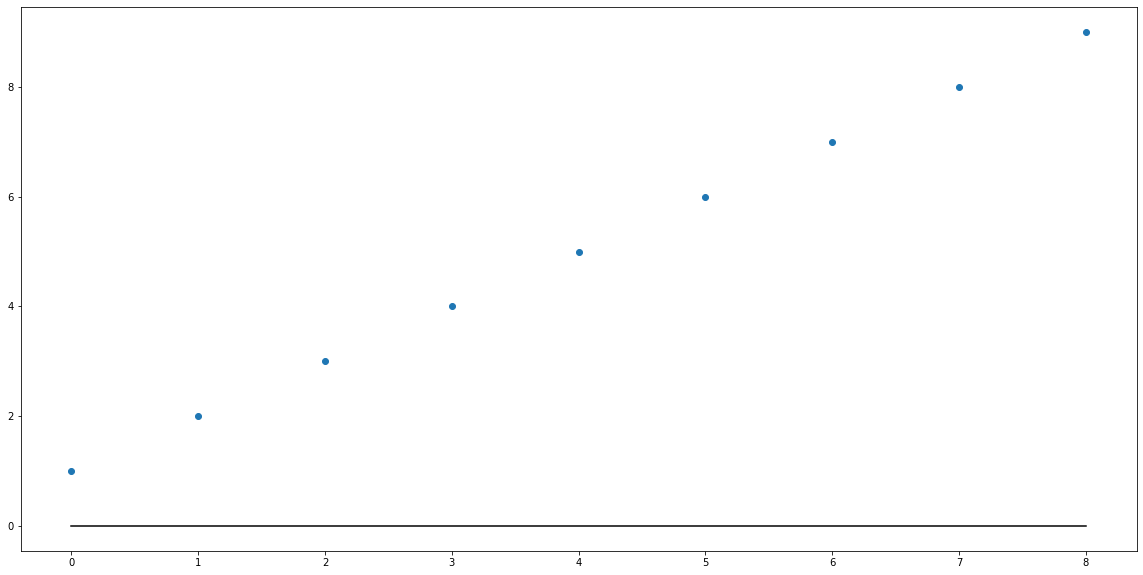

In [822]:
######################################
#Code snippet to set the linewidth of stemlines in plt.stem() function to zero
######################################
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

x=np.array([*range(1,10)]) #discrete instants of time

plt.figure(figsize=(20,10)) #Define the figure size
markerline, stemlines, baseline = plt.stem(x)
plt.setp(stemlines,linewidth=0)
baseline.set_color("k")
plt.show()


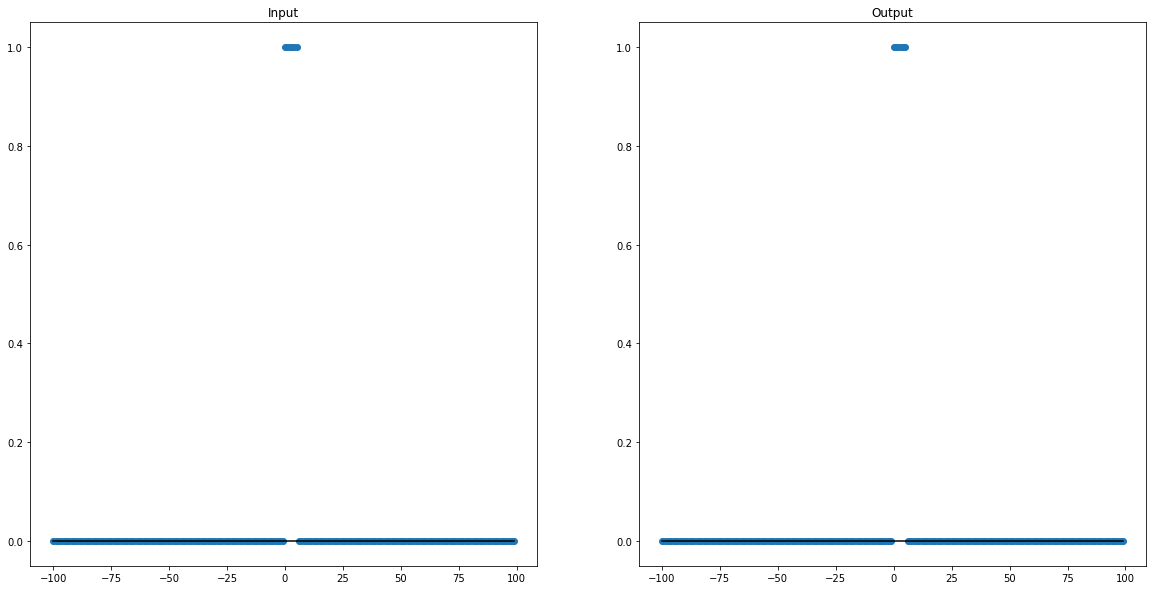

In [33]:
######################################
#Write a function to compute the convolution sum of two sequences
######################################

def convolution(x ,h, n):
    convo = np.zeros(np.shape(n))
    sum = 0
    for i in range(0,len(n)):
        for k in n:
            
            temp1 = np.where(n == (k))[0]
            temp2 = np.where(n == (n[i] - k))[0]
           
            if len(temp1) == 0 or len(temp2) == 0:
                #print("the value of a tuple is " ,i)
                continue
                
            else :
                sum+= x[temp1[0]]*h[temp2[0]]
            
        convo[i] = sum
        sum = 0
    return convo 





######################################
#Ideal distortionless system
######################################
n = np.arange(-100,  100)
# 𝑥[𝑛]=𝑢[𝑛]−𝑢[𝑛−6]
#    ℎ[𝑛]=𝛿[𝑛]
u = np.zeros(np.shape(n))
h = np.zeros(np.shape(n))

#generating the u[n]
for i in range(0,len(n)):
    if n[i] >= 0:
        u[i] = 1
#generating h[n]
for i in range(0,len(n)):
    if n[i] == 0:
        h[i] = 1


#generating u[n-6]
u2 , m2 = delay(u , 6 , n)

Ix = np.zeros(np.shape(n))

#generating ideal distrotion function
for i in range(0,len(n)):
    Ix[i] = u[i] - u2[i]

plt.figure(figsize=(20,10)) #Define the figure size


idealConvo = convolution(Ix , h , n)

plt.subplot(1,2,1)
markerline, stemlines, baseline = plt.stem(n,Ix)
plt.title("Input")
plt.setp(stemlines,linewidth=0)
baseline.set_color("k")
plt.subplot(1,2,2)
plt.title("Output")
markerline, stemlines, baseline = plt.stem(n,idealConvo)
plt.setp(stemlines,linewidth=0)
baseline.set_color("k")















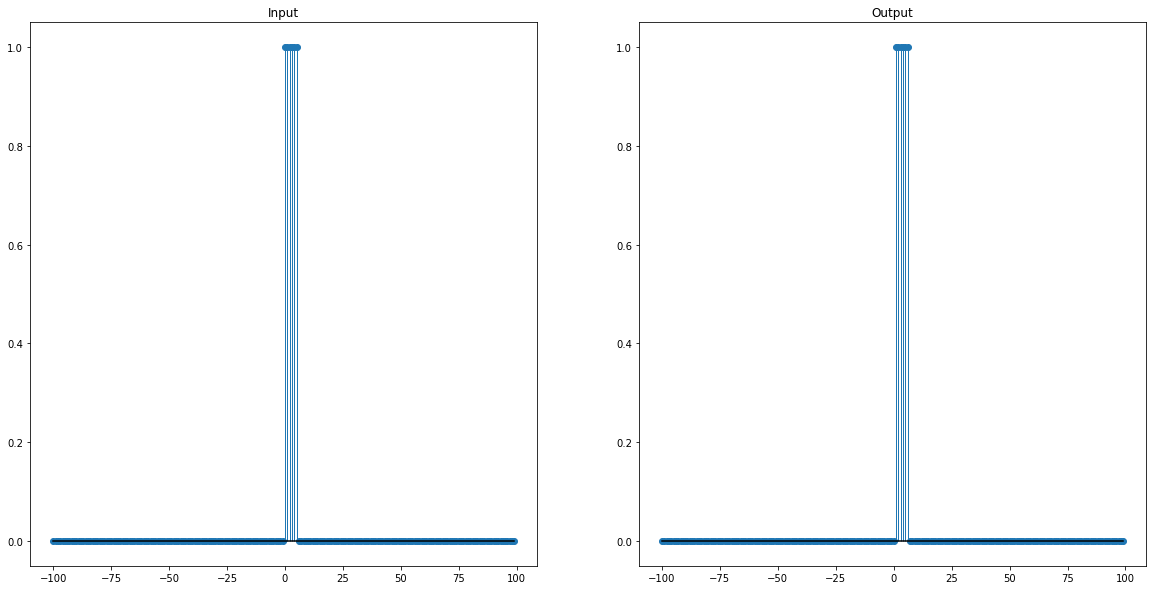

In [34]:
######################################
#Ideal delay system
######################################
#generating h[n-1]
h1 ,M= delay(h, 1,n)


IdConvo = convolution(Ix,h1,n)
plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
markerline, stemlines, baseline = plt.stem(n,Ix)
plt.title("Input")
plt.setp(stemlines,linewidth=1)
baseline.set_color("k")
plt.subplot(1,2,2)
plt.title("Output")
markerline, stemlines, baseline = plt.stem(n,IdConvo)
plt.setp(stemlines,linewidth=1)
baseline.set_color("k")


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


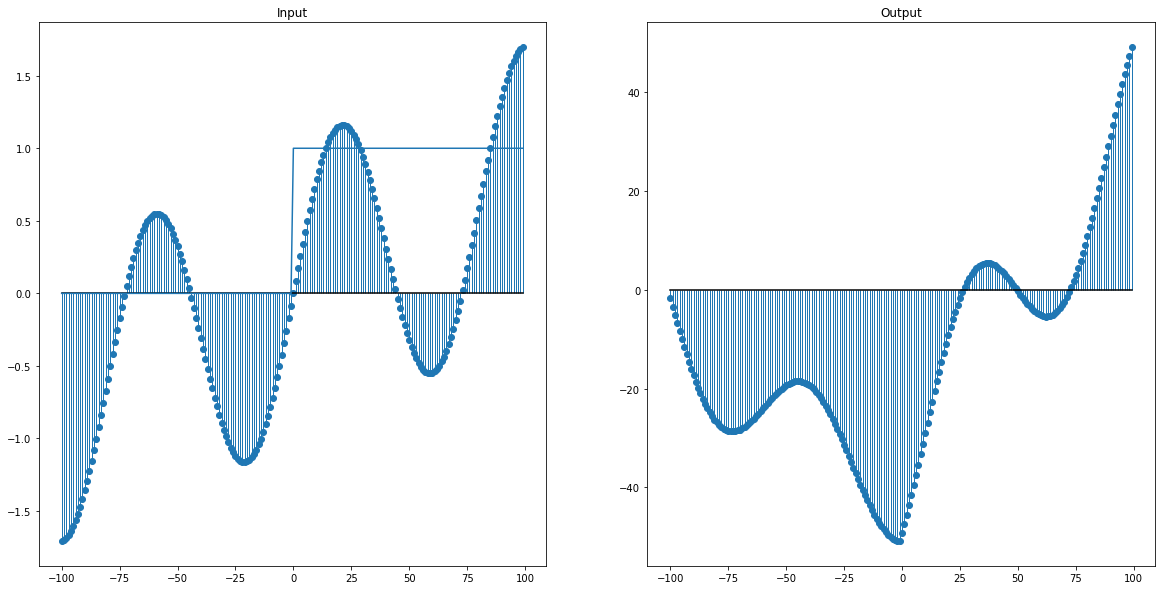

In [46]:

######################################
#Moving average system
######################################
# h[n]
h3 =movingAvg(h ,1000 , n)

print(h3)


x3 = np.zeros(np.shape(n))
for i in range(0 ,len(n)):
    x3[i] = np.sin(2*np.pi*(10/8000)*n[i]) + np.sin(2*np.pi*(100/8000)*n[i])


mavgConvo = convolution(x3,h3,n)

plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
markerline, stemlines, baseline = plt.stem(n,x3)
plt.plot(n,h3)
plt.title("Input")
plt.setp(stemlines,linewidth=1)
baseline.set_color("k")
plt.subplot(1,2,2)
plt.title("Output")
markerline, stemlines, baseline = plt.stem(n,mavgConvo)
plt.setp(stemlines,linewidth=1)
baseline.set_color("k")





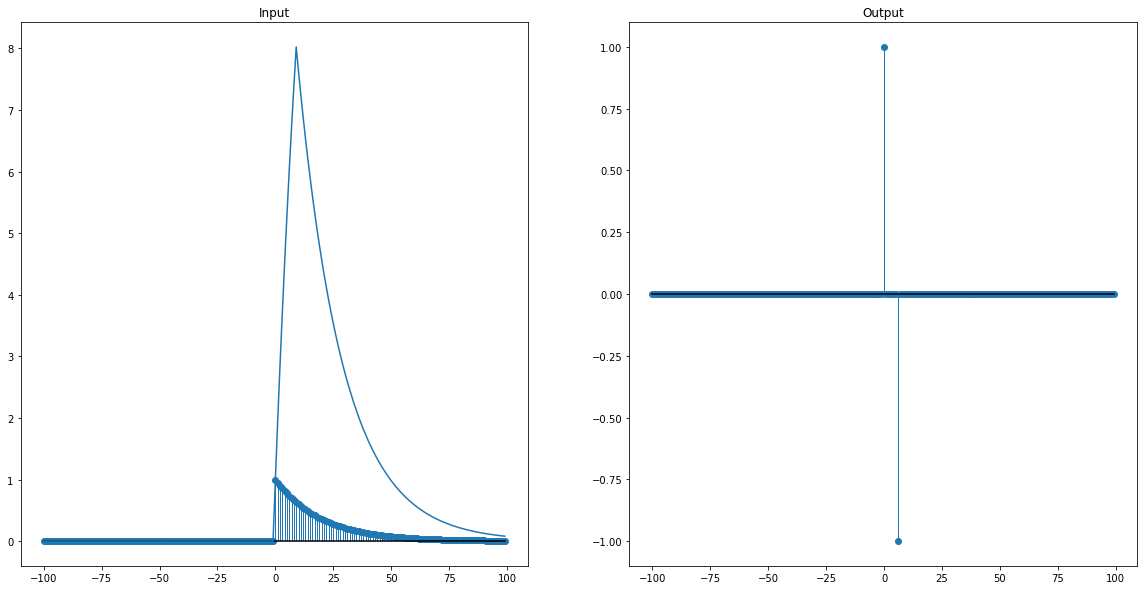

In [39]:
######################################
#Backward difference system
######################################
#generating h[n]
h4 = backwardDifference(h,n)
bdConvo = convolution(Ix,h4,n)

plt.figure(figsize=(20,10)) 
plt.subplot(1,2,1)
markerline, stemlines, baseline = plt.stem(n,x)
plt.plot(n,h3)
plt.title("Input")
plt.setp(stemlines,linewidth=1)
baseline.set_color("k")
plt.subplot(1,2,2)
plt.title("Output")
markerline, stemlines, baseline = plt.stem(n,bdConvo)
plt.setp(stemlines,linewidth=1)
baseline.set_color("k")





<h4> <b> Report your observations : </b>  

<dt> <h4> i. </h4> </dt>
<dt> <h4> ii. </h4> </dt>
<dt> <h4> iii. </h4> </dt>



<h4> <b> Part (4) : Processing natural signals through LTI systems : </b> 

<dt> <h4> In part(2) of the programming assignment, you have learned the concept of the convolution sum and verified it using a few discrete time systems operating on synthetic signals. In the current part, you need to extend the usage of the convolution sum to real-world examples i.e audio/speech signals or digital images. In this part, you are free to use the inbuilt convolution function (np.convolve()) to complete the tasks. You can refer to the previous programming assignment to get assistance in accessing audio, speech, and digital images. </h4> </dt> 



<h4> <b> Programming Questions : </b>  



<dt> <h4> b. Processing audio/speech signals using basic LTI systems    </h4> </dt> 

<dd> <h4> i. Load the audio/speech signal using the sound file module
 </h4> </dd> 
<dd> <h4> ii. Consider the audio/speech signal as the inputs of the following LTI system and compute the output using convolution sum </h4> </dd> 

<dt> <h4> <center> $\hspace{1cm}$ $h[n] = \frac{1}{M+1} \sum\limits_{k=0}^{M} \delta[n-k] $ </center> </dt> </h4>


<dd> <h4> iii. Listen to the output sequences of the LTI systems and report your observations. Clearly mention the impact of the moving average window size in your observations.  </h4> </dd> 

<dd> <h4> iv. Repeat the above experiments with the following impulse responce (i.e backward difference system ) </h4> </dd> 

<dt> <h4> <center> $\hspace{1cm}$ $h[n] = \delta[n] - \delta[n-1] $ </center> </dt> </h4>



<dt> <h4> a. Processing digital images using basic LTI systems    </h4> </dt> 

<dd> <h4> i. Load the digital images (Gray) into NumPy array using the image processing library (matplotlib.image, Pillow or OpenCV)  </h4> </dd> 

<dd> <h4> ii. Convolve the image with the given impulse response both horizontally and vertically. Plot the outputs of LTI systems in both the cases and report your observations. 
 </h4> </dd> 

 <dt> <h4> <center> $\hspace{1cm}$ $h[n] = \delta[n] - \delta[n-1] $ </center> </dt> </h4>

 <dd> <h4> iii. Let us consider two LTI systems. Pass the image to the first LTI system that convolves the input with the impulse response along the width and produces $y_{1}[n]$. Now consider $y_{1}[n]$ as input to the second LTI system that convolves the input with the impulse response along height and produces $y_{2}[n]$. Plot $y_{2}[n]$ and report your observations. Mention the impact of the moving average window size in your observations. </h4> </dd> 

 <dt> <h4> <center> $\hspace{1cm}$ $h[n] = \frac{1}{M+1} \sum\limits_{k=0}^{M} \delta[n-k] $ </center> </dt> </h4>

 <dd> <h4> NOTE: Convolving the image with the impulse response along the width refers to aligning the impulse response horizontally ( i.e $h[n] \in \mathcal{R}^{1 x M}$) and sliding over the image. Similarly, vertical convolution refers to the convolution of the image with the vertically aligned impulse response (i.e $h[n] \in \mathcal{R}^{Mx1})$ </h4> </dd>  










In [ ]:
######################################
#(a)
######################################











######################################
#(b)
######################################













<h4> <b> Report your observations : </b>  

<dt> <h4> i. </h4> </dt>
<dt> <h4> ii. </h4> </dt>
<dt> <h4> iii. </h4> </dt>

